## Customer Churn Prediction

### predicting Customers leaving using decision trees algorithm



### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

### Create and split the data

In [2]:
# Create a dataset of customer information
# Columns: [tenure_months, monthly_charges, total_charges, contract_length, support_calls, service_issues]
# contract_length: 0=month-to-month, 1=one year, 2=two year
X = np.array([
    [1, 80, 80, 0, 3, 2],      # Customer 1
    [35, 65, 2275, 2, 0, 0],   # Customer 2
    [6, 90, 540, 0, 5, 3],     # Customer 3
    [24, 75, 1800, 1, 1, 0],   # Customer 4
    [12, 85, 1020, 0, 2, 1],   # Customer 5
    [48, 60, 2880, 2, 0, 0],   # Customer 6
    [3, 95, 285, 0, 4, 2],     # Customer 7
    [18, 70, 1260, 1, 1, 1],   # Customer 8
    [36, 55, 1980, 2, 0, 0],   # Customer 9
    [2, 100, 200, 0, 6, 4],    # Customer 10
    [30, 65, 1950, 1, 0, 0],   # Customer 11
    [8, 85, 680, 0, 3, 2],     # Customer 12
    [42, 60, 2520, 2, 0, 0],   # Customer 13
    [4, 90, 360, 0, 5, 3],     # Customer 14
    [24, 70, 1680, 1, 1, 1]    # Customer 15
])

# Churn status: 1 = churned, 0 = stayed
y = np.array([1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### Create and Evaluate the model

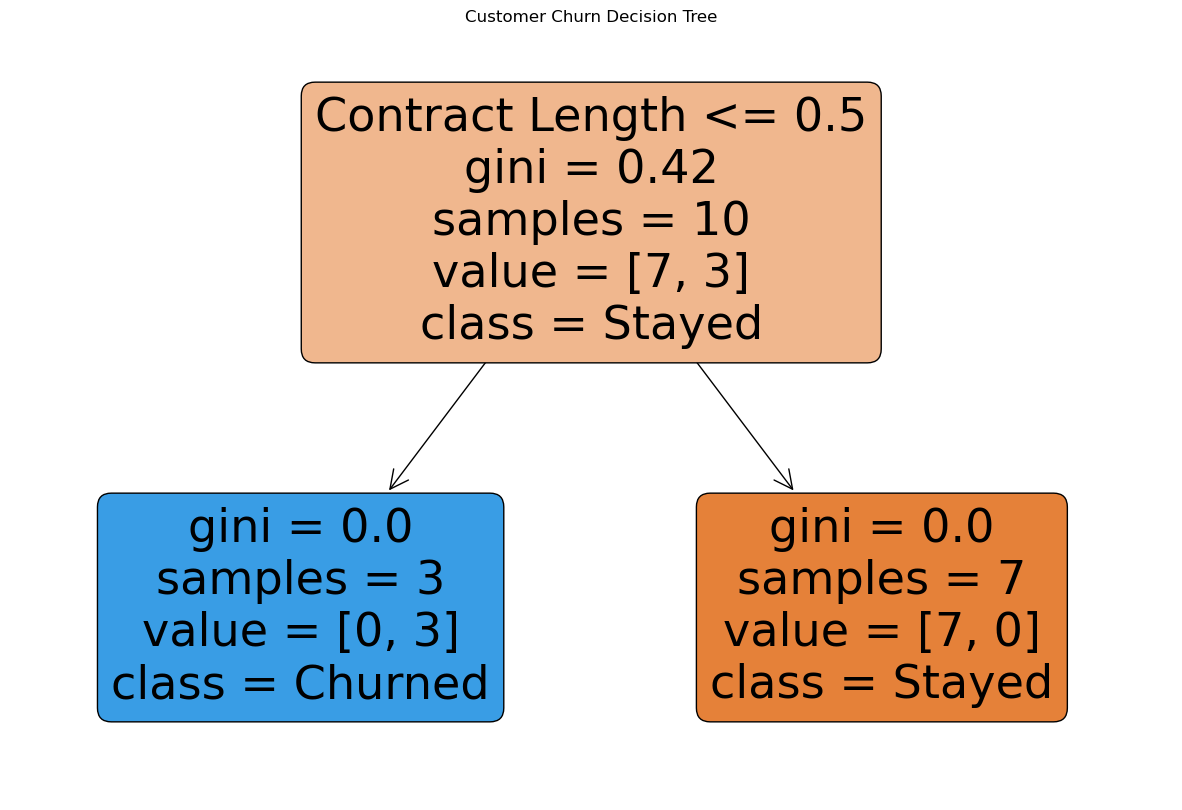

Confusion Matrix:
[[1 0]
 [0 4]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         4

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [3]:
# Create and train the churn prediction model
churn_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)
churn_model.fit(X_train, y_train)

# Visualize the churn decision tree
plt.figure(figsize=(15, 10))
feature_names = ['Tenure (months)', 'Monthly Charges', 'Total Charges', 
                 'Contract Length', 'Support Calls', 'Service Issues']
plot_tree(
    churn_model,
    feature_names=feature_names,
    class_names=['Stayed', 'Churned'],
    filled=True,
    rounded=True
)
plt.title('Customer Churn Decision Tree')
plt.show()

# Evaluate the model
y_pred = churn_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

### Feature importance


Feature ranking for churn prediction:
1. Contract Length: 1.0000
2. Service Issues: 0.0000
3. Support Calls: 0.0000
4. Total Charges: 0.0000
5. Monthly Charges: 0.0000
6. Tenure (months): 0.0000


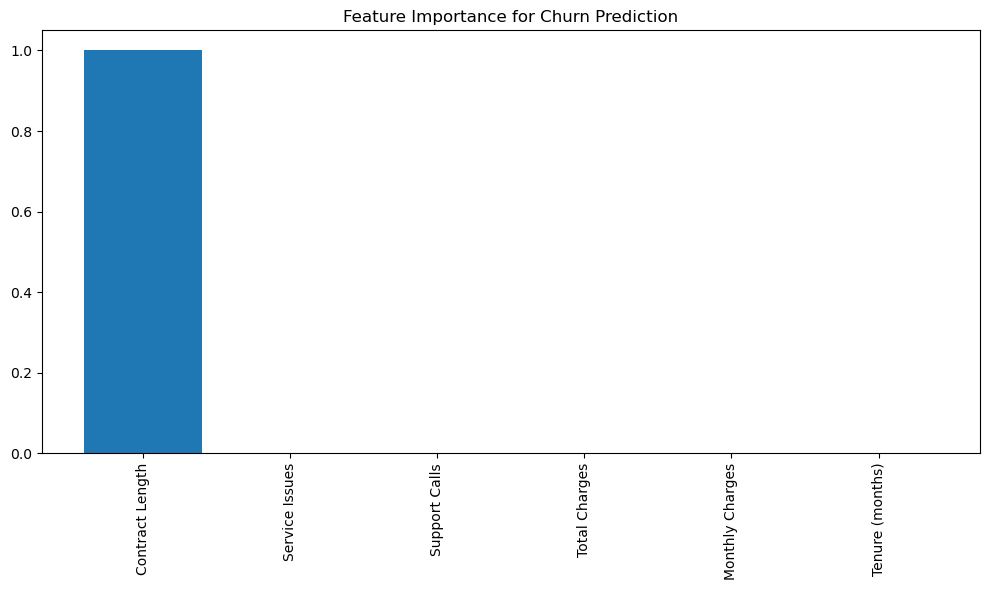

In [4]:
# Calculate feature importance
importances = churn_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("\nFeature ranking for churn prediction:")
for i in range(X.shape[1]):
    print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.title('Feature Importance for Churn Prediction')
plt.tight_layout()
plt.show()

### Predict Customer Churn

In [5]:
# Predict churn probability for new customers
new_customers = np.array([
    [2, 95, 190, 0, 4, 3],    # High-risk customer
    [40, 60, 2400, 2, 0, 0]    # Low-risk customer
])

# Get churn probabilities
churn_probs = churn_model.predict_proba(new_customers)[:, 1]

# Display results
for i, prob in enumerate(churn_probs):
    print(f"Customer {i+1} churn probability: {prob:.2f}")
    
    # Recommend retention actions based on risk
    if prob > 0.7:
        print("  High risk - Immediate contact needed, offer special retention package")
    elif prob > 0.3:
        print("  Medium risk - Proactive outreach, offer loyalty benefits")
    else:
        print("  Low risk - Maintain regular engagement")

Customer 1 churn probability: 1.00
  High risk - Immediate contact needed, offer special retention package
Customer 2 churn probability: 0.00
  Low risk - Maintain regular engagement
